Aleksandra Bednarczuk

# Predictors of elderly citizens willingness to stay in the neighbourhood
# Logistic regression

Original dataset, including barris among predictors

In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [17]:
from imblearn.over_sampling import SMOTE

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats

In [18]:
data = pd.read_pickle("survey_transformed.pkl")

In [19]:
data.head()

,ANY,NOM_DISTRICTE,Would_not_stay_in_the_neighborhood,Gender,Time_living_in_barri,Barri_evolution,Barri_future,Barri_satisfaction_of_living,Barri_comparison,GARBAGE COLLECTION,...,Social_class,Living_alone,BCN_evolution,BCN_future,BCN_satisfaction_of_living,BCN_transport,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport
0,2007,CIUTAT VELLA,0.0,0,I HAVE ALWAYS LIVED IN THE CITY,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,...,MIDDLE-LOW,0,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,GOOD,0,0,0,0
9,2007,CIUTAT VELLA,0.0,1,MORE THAN 10 YEARS,IT IS WORSE,IT WILL STAY THE SAME,SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,...,MIDDLE-LOW,0,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,GOOD,1,1,0,1
12,2007,CIUTAT VELLA,0.0,1,I HAVE ALWAYS LIVED IN THE CITY,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,ONE OF THE BEST,GOOD,...,MIDDLE-LOW,1,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,GOOD,0,0,0,0
14,2007,CIUTAT VELLA,0.0,1,MORE THAN 10 YEARS,IT IS WORSE,IT WILL GET WORSE,SATISFIED,ONE OF THE BEST,GOOD,...,LOW,1,IT IS THE SAME,IT WILL IMPROVE,SATISFIED,GOOD,1,1,0,0
17,2007,CIUTAT VELLA,1.0,1,LESS THAN 10 YEARS,IT IS WORSE,IT WILL GET WORSE,NOT SATISFIED,ONE OF THE WORST,GOOD,...,MIDDLE-MIDDLE,1,IT IS WORSE,IT WILL GET WORSE,NOT SATISFIED,GOOD,0,0,0,0


In [20]:
data.shape

(6914, 34)

In [21]:
data.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'Would_not_stay_in_the_neighborhood',
 'Gender',
 'Time_living_in_barri',
 'Barri_evolution',
 'Barri_future',
 'Barri_satisfaction_of_living',
 'Barri_comparison',
 'GARBAGE COLLECTION',
 'STREETS CLEANING',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'ASPHALT AND STREET CONSERVATION',
 'FACADES AND BUILDING CONSERVATION',
 'CIRCULATION',
 'BUS',
 'CITIZEN SECURITY IN THE CITY AS A WHOLE',
 'CITIZEN SECURITY IN THE NEIGHBORHOOD',
 'MUNICIPAL MARKETS',
 'Barri_transport',
 'Owns_a_car',
 'House_size',
 'Monthly_family_income',
 'Social_class',
 'Living_alone',
 'BCN_evolution',
 'BCN_future',
 'BCN_satisfaction_of_living',
 'BCN_transport',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction_of_living',
 'BCN_over_barri_transport']

In [22]:
x_var = data.columns.tolist()

In [23]:
for i in ['ANY', 'Would_not_stay_in_the_neighborhood',
          'BCN_evolution', 'BCN_future', 'BCN_satisfaction_of_living', 'BCN_transport']:
    x_var.remove(i)

In [24]:
x = data[x_var]

In [25]:
y = data['Would_not_stay_in_the_neighborhood']

In [26]:
x = pd.get_dummies(x, drop_first = True)

In [27]:
x = sm.add_constant(x)

In [28]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.287089
         Iterations: 35
                                           Results: Logit
Model:                    Logit                                   Pseudo R-squared:      0.183      
Dependent Variable:       Would_not_stay_in_the_neighborhood      AIC:                   4067.8631  
Date:                     2021-04-23 07:50                        BIC:                   4403.0870  
No. Observations:         6914                                    Log-Likelihood:        -1984.9    
Df Model:                 48                                      LL-Null:               -2430.0    
Df Residuals:             6865                                    LLR p-value:           1.6771e-155
Converged:                0.0000                                  Scale:                 1.0000     
No. Iterations:           35.0000                                                                   
--------------------------------------------------------------------

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [29]:
result.pvalues.sort_values(ascending=False)

Social_class_MIDDLE-MIDDLE                      9.962381e-01
Social_class_MIDDLE-HIGH                        9.962252e-01
Social_class_MIDDLE-LOW                         9.962224e-01
Social_class_LOW                                9.962093e-01
const                                           9.959830e-01
Monthly_family_income_< 1000 EUROS              9.601376e-01
Barri_transport_NORMAL                          9.300445e-01
FACADES AND BUILDING CONSERVATION_GOOD          9.168109e-01
STREETS CLEANING_GOOD                           8.986319e-01
CIRCULATION_GOOD                                8.966257e-01
Barri_evolution_IT IS WORSE                     8.151023e-01
Barri_transport_GOOD                            7.725695e-01
Barri_evolution_IT IS THE SAME                  6.598238e-01
BCN_over_barri_future                           6.483001e-01
MUNICIPAL MARKETS_GOOD                          6.474617e-01
NOM_DISTRICTE_HORTA - GUINARDÓ                  4.635538e-01
NOM_DISTRICTE_SANT ANDRE

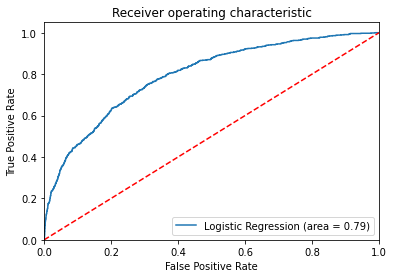

In [30]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [15]:
# NIE POPRAWIŁAM PONIŻSZEGO FEATURE SELECTION

In [15]:
for i in ['GARBAGE COLLECTION', 'BCN_over_barri_evolution', 'Barri_transport', 'Barri_evolution', 'Owns_a_car']:
    x_var.remove(i)

In [16]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)

In [17]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.303848
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.184      
Dependent Variable:    Would_not_stay_in_the_neighborhood    AIC:                 2837.4685  
Date:                  2021-04-15 21:27                      BIC:                 3107.0538  
No. Observations:      4531                                  Log-Likelihood:      -1376.7    
Df Model:              41                                    LL-Null:             -1686.8    
Df Residuals:          4489                                  LLR p-value:         1.5825e-104
Converged:             1.0000                                Scale:               1.0000     
No. Iterations:        7.0000                                                                
--------------------------------------------------------------------------------------------

In [18]:
result.pvalues.sort_values(ascending=False)

NOM_DISTRICTE_SANT ANDREU                       7.352280e-01
NOM_DISTRICTE_SANTS - MONTJUÏC                  6.920358e-01
NOM_DISTRICTE_NOU BARRIS                        5.903993e-01
FACADES AND BUILDING CONSERVATION_GOOD          5.816243e-01
NOM_DISTRICTE_GRÀCIA                            5.603563e-01
CIRCULATION_GOOD                                5.591326e-01
NOM_DISTRICTE_HORTA - GUINARDÓ                  4.512783e-01
MUNICIPAL POLICE_GOOD                           4.425924e-01
Gender                                          4.016018e-01
Monthly_family_income_< 1000 EUROS              3.964083e-01
BCN_over_barri_future                           3.573736e-01
House_size_< 50 M2                              2.674993e-01
STREETS CLEANING_GOOD                           2.601300e-01
House_size_51-100 M2                            2.588541e-01
PUBLIC LIGHTING_GOOD                            2.551254e-01
MUNICIPAL MARKETS_GOOD                          2.273961e-01
ASPHALT AND STREET CONSE

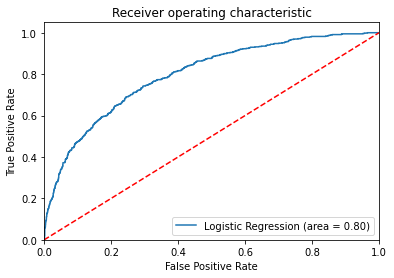

In [19]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [20]:
for i in ['FACADES AND BUILDING CONSERVATION', 'MUNICIPAL POLICE', 'CIRCULATION', 'Gender']:
    x_var.remove(i)

In [21]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)

In [22]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.304045
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.183      
Dependent Variable:    Would_not_stay_in_the_neighborhood    AIC:                 2831.2597  
Date:                  2021-04-15 21:27                      BIC:                 3075.1702  
No. Observations:      4531                                  Log-Likelihood:      -1377.6    
Df Model:              37                                    LL-Null:             -1686.8    
Df Residuals:          4493                                  LLR p-value:         1.3727e-106
Converged:             1.0000                                Scale:               1.0000     
No. Iterations:        7.0000                                                                
--------------------------------------------------------------------------------------------

In [23]:
result.pvalues.sort_values(ascending=False)

NOM_DISTRICTE_SANT ANDREU                       7.649836e-01
NOM_DISTRICTE_SANTS - MONTJUÏC                  7.148756e-01
NOM_DISTRICTE_NOU BARRIS                        5.986619e-01
NOM_DISTRICTE_GRÀCIA                            5.018045e-01
NOM_DISTRICTE_HORTA - GUINARDÓ                  4.674053e-01
Monthly_family_income_< 1000 EUROS              4.360569e-01
BCN_over_barri_future                           3.849977e-01
House_size_< 50 M2                              2.848216e-01
House_size_51-100 M2                            2.651160e-01
STREETS CLEANING_GOOD                           2.311263e-01
MUNICIPAL MARKETS_GOOD                          2.294668e-01
PUBLIC LIGHTING_GOOD                            2.249866e-01
ASPHALT AND STREET CONSERVATION_GOOD            1.872462e-01
Monthly_family_income_2001-3000 EUROS           1.636005e-01
NOM_DISTRICTE_SANT MARTÍ                        1.220108e-01
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD    1.046799e-01
GREEN AREAS_GOOD        

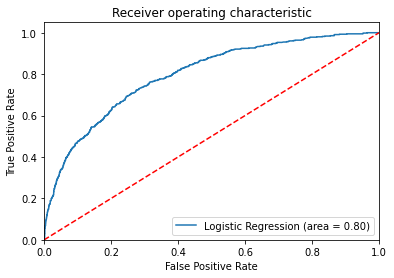

In [24]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [25]:
for i in ['BCN_over_barri_future', 'House_size', 'MUNICIPAL MARKETS', 'STREETS CLEANING']:
    x_var.remove(i)

In [26]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)

In [27]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.304796
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.181      
Dependent Variable:    Would_not_stay_in_the_neighborhood    AIC:                 2826.0602  
Date:                  2021-04-15 21:27                      BIC:                 3031.4586  
No. Observations:      4531                                  Log-Likelihood:      -1381.0    
Df Model:              31                                    LL-Null:             -1686.8    
Df Residuals:          4499                                  LLR p-value:         5.2546e-109
Converged:             1.0000                                Scale:               1.0000     
No. Iterations:        7.0000                                                                
--------------------------------------------------------------------------------------------

In [28]:
result.pvalues.sort_values(ascending=False)

NOM_DISTRICTE_SANTS - MONTJUÏC                  7.856279e-01
NOM_DISTRICTE_SANT ANDREU                       6.580760e-01
NOM_DISTRICTE_NOU BARRIS                        6.151185e-01
Monthly_family_income_< 1000 EUROS              5.122511e-01
NOM_DISTRICTE_HORTA - GUINARDÓ                  4.785962e-01
NOM_DISTRICTE_GRÀCIA                            4.752130e-01
Social_class_MIDDLE-MIDDLE                      2.423109e-01
PUBLIC LIGHTING_GOOD                            2.334467e-01
ASPHALT AND STREET CONSERVATION_GOOD            2.118777e-01
Social_class_MIDDLE-LOW                         1.937336e-01
Social_class_LOW                                1.676865e-01
Monthly_family_income_2001-3000 EUROS           1.433434e-01
BUS_GOOD                                        1.274790e-01
Social_class_MIDDLE-HIGH                        1.169051e-01
NOM_DISTRICTE_SANT MARTÍ                        1.168747e-01
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD    9.305967e-02
Living_alone            

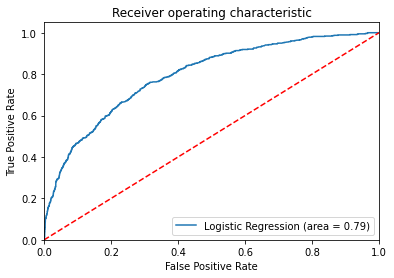

In [29]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [30]:
for i in ['PUBLIC LIGHTING', 'ASPHALT AND STREET CONSERVATION', 'Monthly_family_income', 'Social_class']:
    x_var.remove(i)

In [31]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)

In [32]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.306263
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.177      
Dependent Variable:    Would_not_stay_in_the_neighborhood    AIC:                 2821.3589  
Date:                  2021-04-15 21:27                      BIC:                 2968.9890  
No. Observations:      4531                                  Log-Likelihood:      -1387.7    
Df Model:              22                                    LL-Null:             -1686.8    
Df Residuals:          4508                                  LLR p-value:         1.9365e-112
Converged:             1.0000                                Scale:               1.0000     
No. Iterations:        7.0000                                                                
--------------------------------------------------------------------------------------------

In [33]:
result.pvalues.sort_values(ascending=False)

NOM_DISTRICTE_GRÀCIA                            5.822321e-01
Living_alone                                    4.725956e-01
NOM_DISTRICTE_SANTS - MONTJUÏC                  4.585485e-01
NOM_DISTRICTE_SANT ANDREU                       4.066401e-01
NOM_DISTRICTE_NOU BARRIS                        2.887351e-01
NOM_DISTRICTE_HORTA - GUINARDÓ                  1.991076e-01
BCN_over_barri_satisfaction_of_living           9.896220e-02
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD    8.234434e-02
NOM_DISTRICTE_SARRIÀ - SANT GERVASI             5.947893e-02
NOM_DISTRICTE_SANT MARTÍ                        4.614597e-02
BCN_over_barri_transport                        3.427017e-02
GREEN AREAS_GOOD                                3.201840e-02
CITIZEN SECURITY IN THE NEIGHBORHOOD_GOOD       2.673117e-02
BUS_GOOD                                        2.285741e-02
Time_living_in_barri_MORE THAN 10 YEARS         1.667234e-02
Barri_future_IT WILL STAY THE SAME              1.581356e-02
NOM_DISTRICTE_EIXAMPLE  

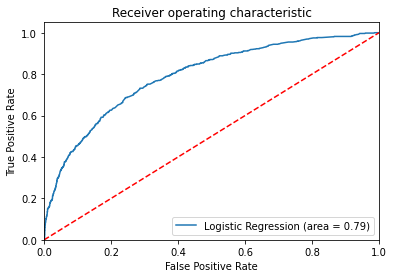

In [34]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [35]:
for i in ['Living_alone']:
    x_var.remove(i)

In [36]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)

In [37]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.306320
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.177      
Dependent Variable:    Would_not_stay_in_the_neighborhood    AIC:                 2819.8721  
Date:                  2021-04-15 21:27                      BIC:                 2961.0834  
No. Observations:      4531                                  Log-Likelihood:      -1387.9    
Df Model:              21                                    LL-Null:             -1686.8    
Df Residuals:          4509                                  LLR p-value:         4.5883e-113
Converged:             1.0000                                Scale:               1.0000     
No. Iterations:        7.0000                                                                
--------------------------------------------------------------------------------------------

In [38]:
result.pvalues.sort_values(ascending=False)

NOM_DISTRICTE_GRÀCIA                            5.670791e-01
NOM_DISTRICTE_SANTS - MONTJUÏC                  4.518141e-01
NOM_DISTRICTE_SANT ANDREU                       3.926385e-01
NOM_DISTRICTE_NOU BARRIS                        2.792448e-01
NOM_DISTRICTE_HORTA - GUINARDÓ                  1.935683e-01
BCN_over_barri_satisfaction_of_living           8.591280e-02
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD    8.553691e-02
NOM_DISTRICTE_SARRIÀ - SANT GERVASI             5.855679e-02
NOM_DISTRICTE_SANT MARTÍ                        4.495780e-02
GREEN AREAS_GOOD                                3.418710e-02
BCN_over_barri_transport                        3.220813e-02
CITIZEN SECURITY IN THE NEIGHBORHOOD_GOOD       2.765699e-02
BUS_GOOD                                        2.462234e-02
Barri_future_IT WILL STAY THE SAME              1.662007e-02
Time_living_in_barri_MORE THAN 10 YEARS         1.470394e-02
NOM_DISTRICTE_EIXAMPLE                          1.379158e-02
NOM_DISTRICTE_LES CORTS 

In [39]:
print(result.get_margeff().summary())

                Logit Marginal Effects               
Dep. Variable:     Would_not_stay_in_the_neighborhood
Method:                                          dydx
At:                                           overall
                                                  dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
BCN_over_barri_satisfaction_of_living            0.0317      0.018      1.718      0.086      -0.004       0.068
BCN_over_barri_transport                         0.0277      0.013      2.143      0.032       0.002       0.053
NOM_DISTRICTE_EIXAMPLE                          -0.0447      0.018     -2.466      0.014      -0.080      -0.009
NOM_DISTRICTE_GRÀCIA                             0.0121      0.021      0.572      0.567      -0.029       0.053
NOM_DISTRICTE_HORTA - GUINARDÓ                  -0.0243      0.019     -1.301      0.193      -0.061      

In [40]:
result.pred_table()

array([[3910.,   65.],
       [ 464.,   92.]])

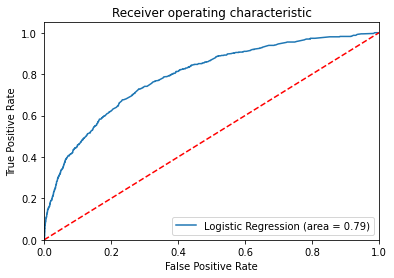

In [41]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()